In [1]:
# install fastkaggle if not available
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle

from fastkaggle import *

## Getting set up

In [2]:
comp = 'playground-series-s3e25'
path = setup_comp(comp, install='')

In [3]:
path

Path('playground-series-s3e25')

In [4]:
trn_path = path/'train.csv'

In [5]:
get_dataset(path, "jocelyndumlao/prediction-of-mohs-hardness-with-machine-learning", force=True) # extra dataset provided by the author of the competition

In [6]:
xa_path = path/'jm79zfps6b-1'

In [7]:
xa_path.ls()

(#2) [Path('playground-series-s3e25/jm79zfps6b-1/Artificial_Crystals_Dataset.csv'),Path('playground-series-s3e25/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv')]

In [10]:
import pandas as pd
acd = pd.read_csv(xa_path/'Artificial_Crystals_Dataset.csv')

In [11]:
acd.shape

(52, 15)

In [12]:
mdsi = pd.read_csv(xa_path/'Mineral_Dataset_Supplementary_Info.csv')

In [13]:
mdsi.shape

(622, 13)

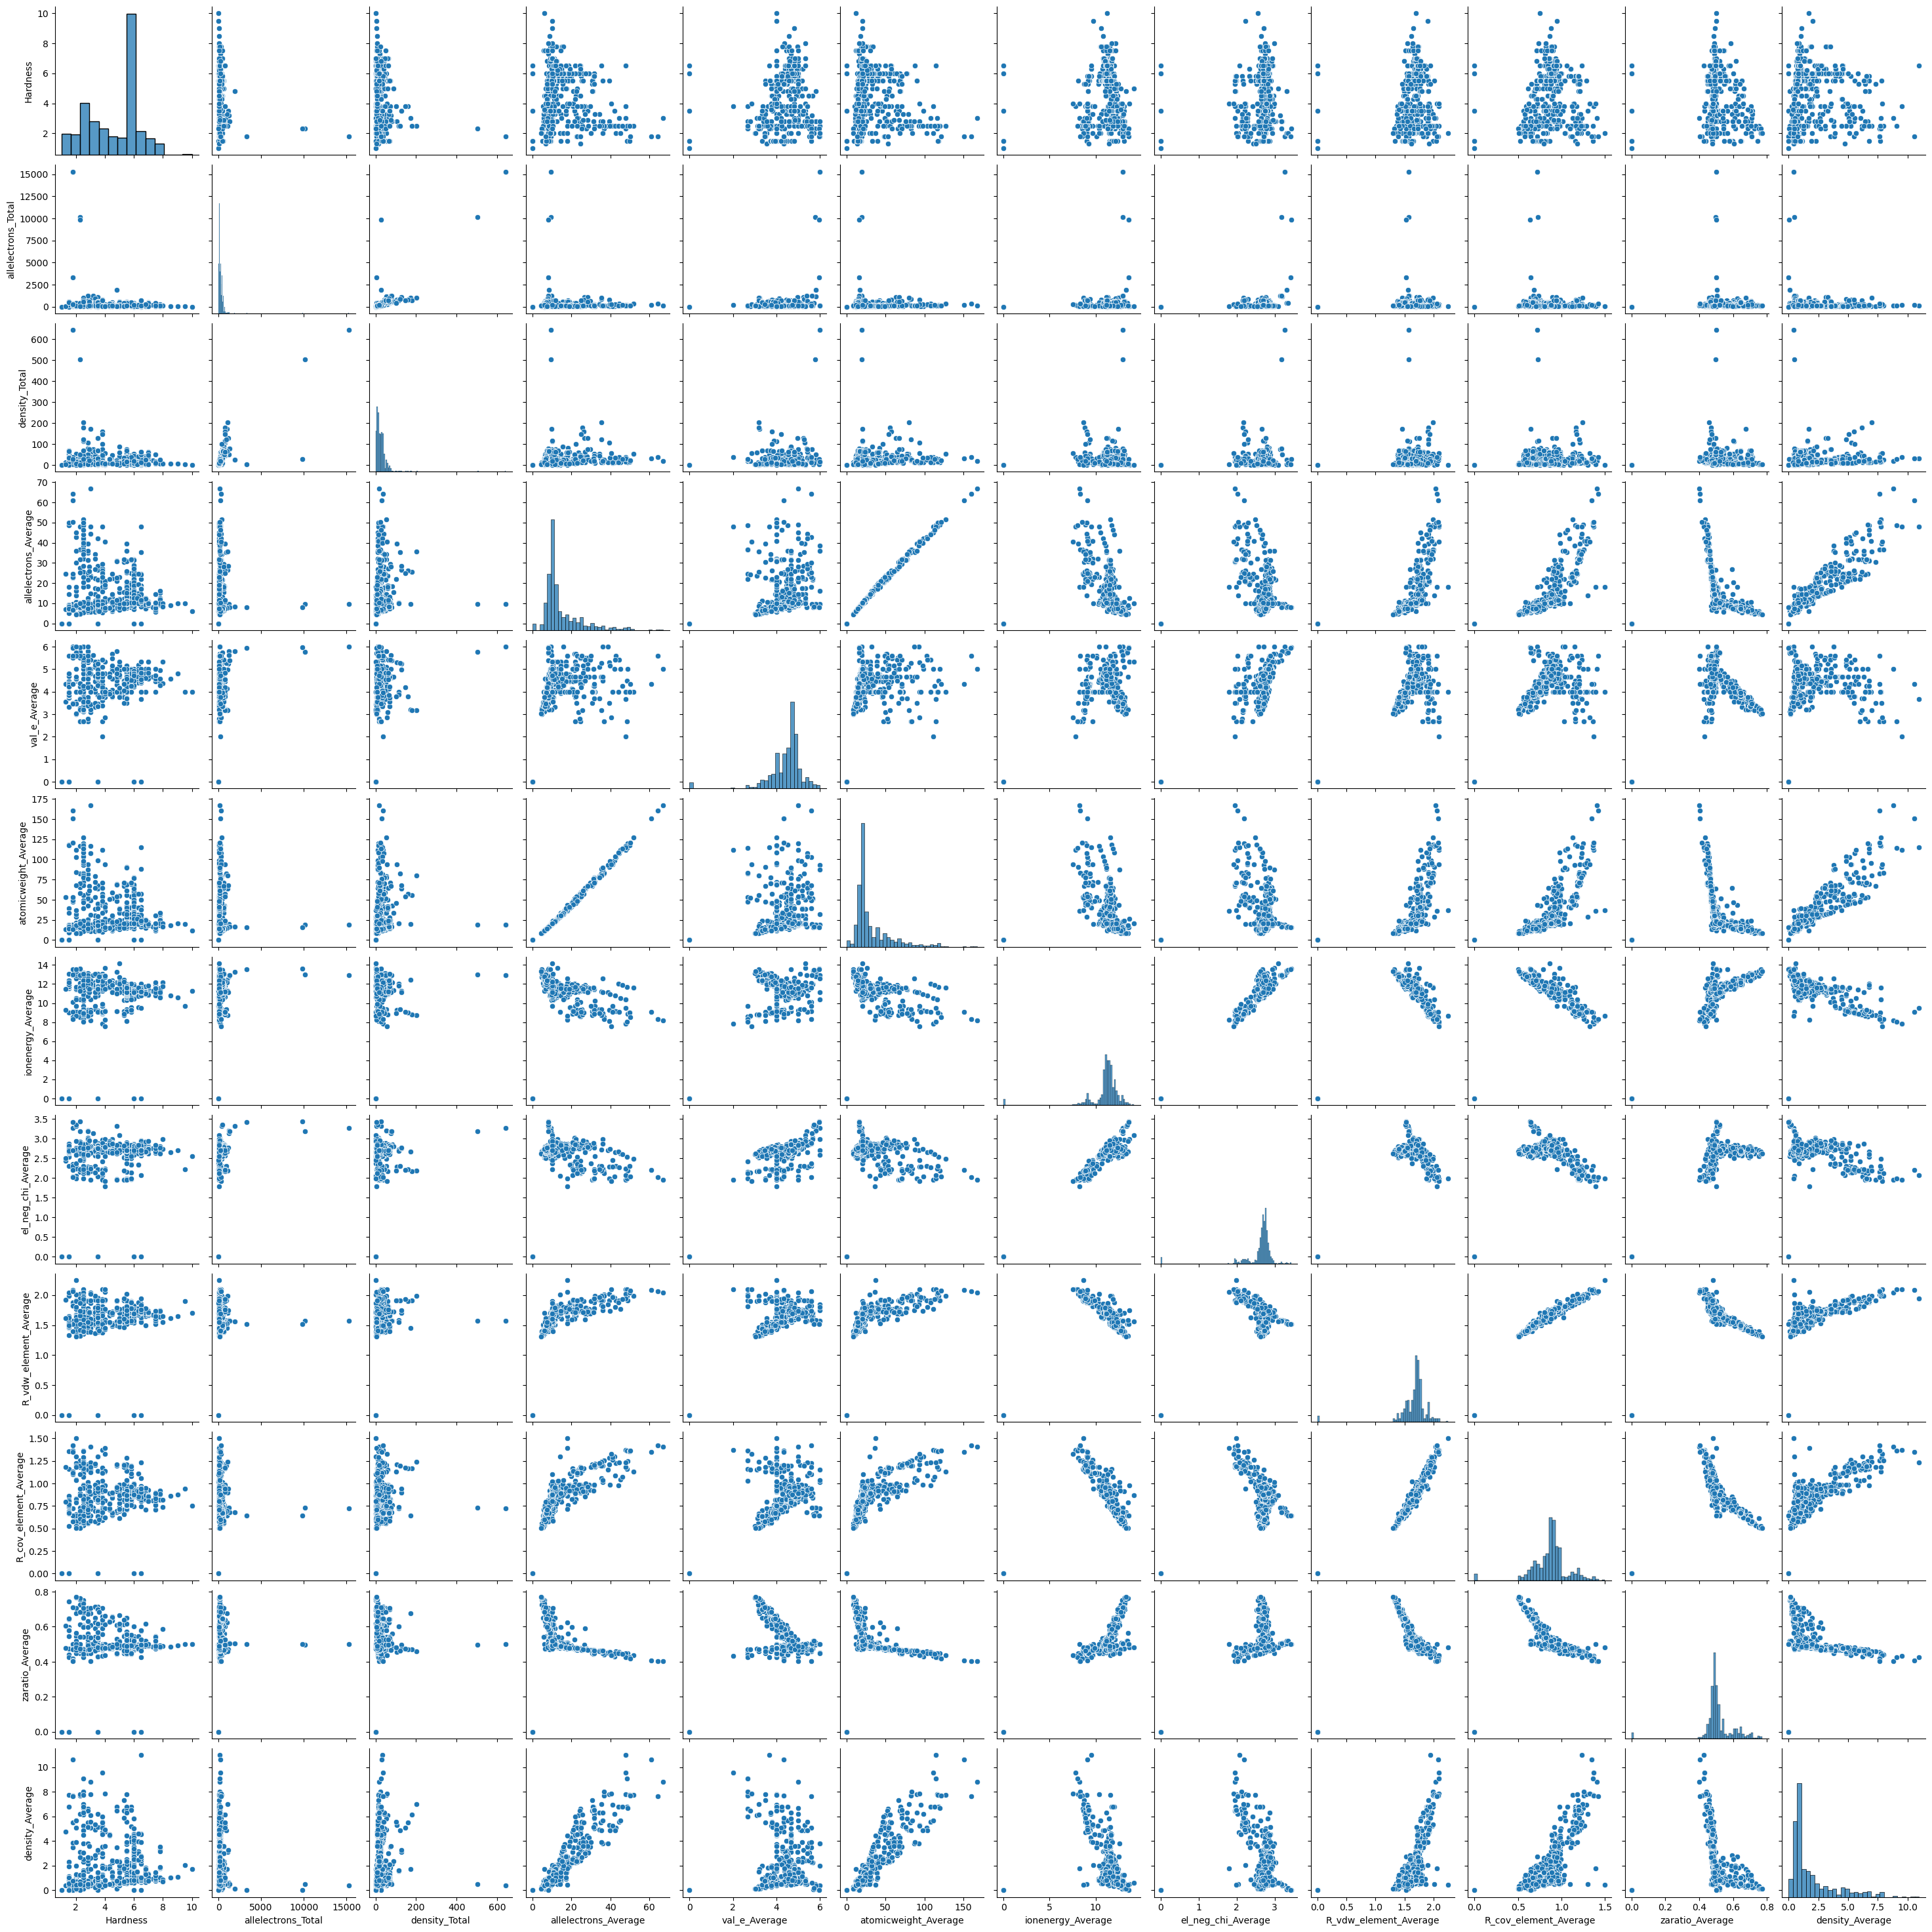

In [15]:
import seaborn as sns
sns.pairplot(mdsi.iloc[:,1:])

## Perculiar zeros

from the pairplot we observe that there are isolated zeros (bottom left corner) in multiple plots. I suspect that there are rows filled with zeros. Let's investigate.  

In [23]:
mask = (mdsi.iloc[:,2:]==0).any(axis=1) # drop id and hardness
mdsi[mask]

Unnamed: 0  Hardness  allelectrons_Total  density_Total  \
150         152       6.5                 0.0            0.0   
156         158       6.0                 0.0            0.0   
317         323       3.5                 0.0            0.0   
387         393       1.5                 0.0            0.0   
388         394       1.5                 0.0            0.0   
389         395       1.5                 0.0            0.0   
390         396       1.5                 0.0            0.0   
391         397       1.5                 0.0            0.0   
392         398       1.5                 0.0            0.0   
552         559       1.0                 0.0            0.0   

     allelectrons_Average  val_e_Average  atomicweight_Average  \
150                   0.0            0.0                   0.0   
156                   0.0            0.0                   0.0   
317                   0.0            0.0                   0.0   
387                   0.0            0.0                   0.0   
388                   0.0            0.0                   0.0   
389                   0.0            0.0                   0.0   
390                   0.0            0.0                   0.0   
391                   0.0            0.0                   0.0   
392                   0.0            0.0                   0.0   
552                   0.0            0.0                   0.0   

     ionenergy_Average  el_neg_chi_Average  R_vdw_element_Average  \
150                0.0                 0.0                    0.0   
156                0.0                 0.0                    0.0   
317                0.0                 0.0                    0.0   
387                0.0                 0.0                    0.0   
388                0.0                 0.0                    0.0   
389                0.0                 0.0                    0.0   
390                0.0                 0.0                    0.0   
391                0.0                 0.0                    0.0   
392                0.0                 0.0                    0.0   
552                0.0                 0.0                    0.0   

     R_cov_element_Average  zaratio_Average  density_Average  
150                    0.0              0.0              0.0  
156                    0.0              0.0              0.0  
317                    0.0              0.0              0.0  
387                    0.0              0.0              0.0  
388                    0.0              0.0              0.0  
389                    0.0              0.0              0.0  
390                    0.0              0.0              0.0  
391                    0.0              0.0              0.0  
392                    0.0              0.0              0.0  
552                    0.0              0.0              0.0

Confirmed! Now let's check if this also happens with the competition dataset. 

In [22]:
df = pd.read_csv(trn_path)
maz = (df.iloc[:,1:-1] == 0).any(axis=1)  # drop id and hardness 
df[maz]

id  allelectrons_Total  density_Total  allelectrons_Average  \
22        22                 0.0       0.755433              0.000000   
99        99                42.0       0.000000              0.000000   
272      272               198.0       9.148824              4.814815   
390      390                40.0       1.743160              6.666667   
524      524                 0.0       0.000000              0.000000   
...      ...                 ...            ...                   ...   
10237  10237                30.0       4.542664             11.000000   
10242  10242                 0.0       0.000000              0.000000   
10321  10321                 0.0       0.505992              0.000000   
10378  10378               120.0      15.550000             12.000000   
10395  10395                 0.0       0.000000              0.000000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
22          0.000000              0.000000           0.000000   
99          4.000000              0.000000           0.026725   
272         3.459459              8.462067          13.266033   
390         4.000000             13.016128          12.700467   
524         0.000000              0.000000           0.000000   
...              ...                   ...                ...   
10237       4.666667             22.521872          12.392110   
10242       0.000000              0.000000           0.000000   
10321       0.000000              0.000000           0.000000   
10378       4.000000             26.024935          10.600980   
10395       0.000000              0.000000           0.000000   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
22               0.000000               0.000000               0.000000   
99               2.727000               1.767000               0.000000   
272              2.065000               1.394000               0.574595   
390              2.770000               1.476667               0.616667   
524              0.000000               0.000000               0.000000   
...                   ...                    ...                    ...   
10237            2.766667               1.625000               0.000000   
10242            0.000000               0.000000               0.000000   
10321            0.000000               0.000000               0.000000   
10378            2.644000               1.794000               0.926000   
10395            0.000000               0.000000               0.000000   

       zaratio_Average  density_Average  Hardness  
22            0.000000          0.80454       2.5  
99            0.000000          0.80212       6.0  
272           0.770755          0.00000       2.0  
390           0.663797          0.00000       5.0  
524           0.000000          0.50633       1.5  
...                ...              ...       ...  
10237         0.499074          1.02048       4.8  
10242         0.000000          0.82753       1.5  
10321         0.499404          0.01079       6.5  
10378         0.499010          0.00000       5.0  
10395         0.000000          0.79010       1.5  

[120 rows x 13 columns]

In [24]:
mallz = (df.iloc[:,1:-1] == 0).all(axis=1)
df[mallz] 

Empty DataFrame
Columns: [id, allelectrons_Total, density_Total, allelectrons_Average, val_e_Average, atomicweight_Average, ionenergy_Average, el_neg_chi_Average, R_vdw_element_Average, R_cov_element_Average, zaratio_Average, density_Average, Hardness]
Index: []

In [39]:
df_te = pd.read_csv(path/'test.csv')

def find_zeros(df): 
    maz = (df.iloc[:,1:] == 0).any(axis=1)  # drop id only (no hardness in test.csv)
    print('check any zero')
    display(df[maz])
    maz = (df.iloc[:,1:] == 0).all(axis=1)  # drop id 
    print('check all zero')
    display(df[maz])

find_zeros(df_te)

check any zero


id  allelectrons_Total  density_Total  allelectrons_Average  \
16    10423                86.0       4.075328             14.833333   
170   10577                 0.0       0.000000              0.000000   
198   10605                 0.0       0.000000              0.000000   
236   10643                 0.0       0.000000              0.000000   
279   10686                80.0       5.401996             10.000000   
...     ...                 ...            ...                   ...   
6682  17089                 0.0       0.000000              0.000000   
6713  17120               131.0      14.368979             10.111111   
6715  17122                 0.0       0.000000              0.000000   
6752  17159                 0.0       0.000000              0.000000   
6817  17224                 0.0       0.000000              0.000000   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
16         4.666667             30.645954          11.711717   
170        0.000000              0.000000           0.000000   
198        0.000000              0.000000           0.000000   
236        0.000000              0.000000           0.000002   
279        6.000000             20.298893          15.245810   
...             ...                   ...                ...   
6682       4.000000              0.000000           0.000000   
6713       4.666667             22.282681          11.634467   
6715       0.000000              0.000000          10.370000   
6752       0.000000              0.000000           0.000000   
6817       0.000000              0.000000           0.000000   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
16              2.330000               1.923333               0.918333   
170             0.000000               0.000000               0.000000   
198             1.990000               0.000000               0.000000   
236             0.000000               0.000000               0.000000   
279             3.443000               1.662000               0.836000   
...                  ...                    ...                    ...   
6682            0.000000               0.000000               0.000000   
6713            2.798889               1.734444               0.915556   
6715            0.000000               0.000000               0.000000   
6752            0.000000               0.000000               0.000000   
6817            0.000000               0.000000               0.000000   

      zaratio_Average  density_Average  
16           0.440893          0.00000  
170          0.000000          0.75516  
198          0.000000          0.00000  
236          0.000000          0.00000  
279          0.499010          0.00000  
...               ...              ...  
6682         0.000000          0.00000  
6713         0.490901          0.00000  
6715         0.000000          0.00000  
6752         0.000000          0.96683  
6817         0.000000          0.65306  

[72 rows x 12 columns]

check all zero


Empty DataFrame
Columns: [id, allelectrons_Total, density_Total, allelectrons_Average, val_e_Average, atomicweight_Average, ionenergy_Average, el_neg_chi_Average, R_vdw_element_Average, R_cov_element_Average, zaratio_Average, density_Average]
Index: []

In [40]:
72/df_te.shape[0], 10/600

(0.010376134889753566, 0.016666666666666666)

## Hypothesis

- zero is not physical.
- in the real dataset, there are 10 all-zero rows probably due to missing input and missingness is replaced by zero.  
- the dataset generated by deep learning model does not contain all-zero rows, but there are 72 rows with at least one zero. Neural network learnt (the unphysical) 0-patterns in the training set.  

In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, FunctionTransformer, QuantileTransformer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, median_absolute_error as medae
from scipy.stats import loguniform

In [43]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X_tr, X_dev, y_tr, y_dev = train_test_split(X,y,test_size=0.2) # XXyy

In [64]:
np.sum(np.isnan(np.where(X!=0, X, np.nan)), axis=0)

array([76, 54, 76, 71, 77, 73, 67, 68, 77, 62, 56])

In [66]:
X = df.iloc[:,1:-1]
X = pd.DataFrame(np.where(X!=0, X, np.nan), columns=df.columns[1:-1]) # replace 0 with np.nan
y = df.iloc[:,-1]
X_tr, X_dev, y_tr, y_dev = train_test_split(X,y,test_size=0.2) # XXyy

<class 'numpy.ndarray'>


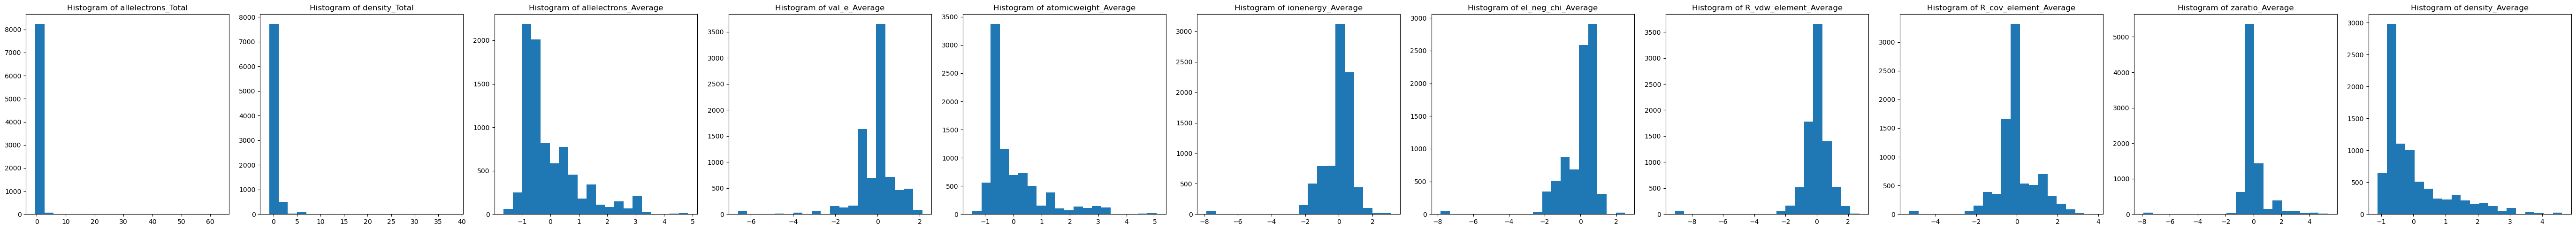

In [40]:
def show_hist_tf(X_tr):
    cols = X_tr.columns
    df = StandardScaler().fit_transform(X_tr)
    print(type(df))
    n_rows = 1
    n_cols = df.shape[1]
    
    plt.figure(figsize=(5 * n_cols, 5 * n_rows))
    
    for i, column in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(df[:,i],bins=20)
        plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

show_hist_tf(X_tr)

<class 'numpy.ndarray'>


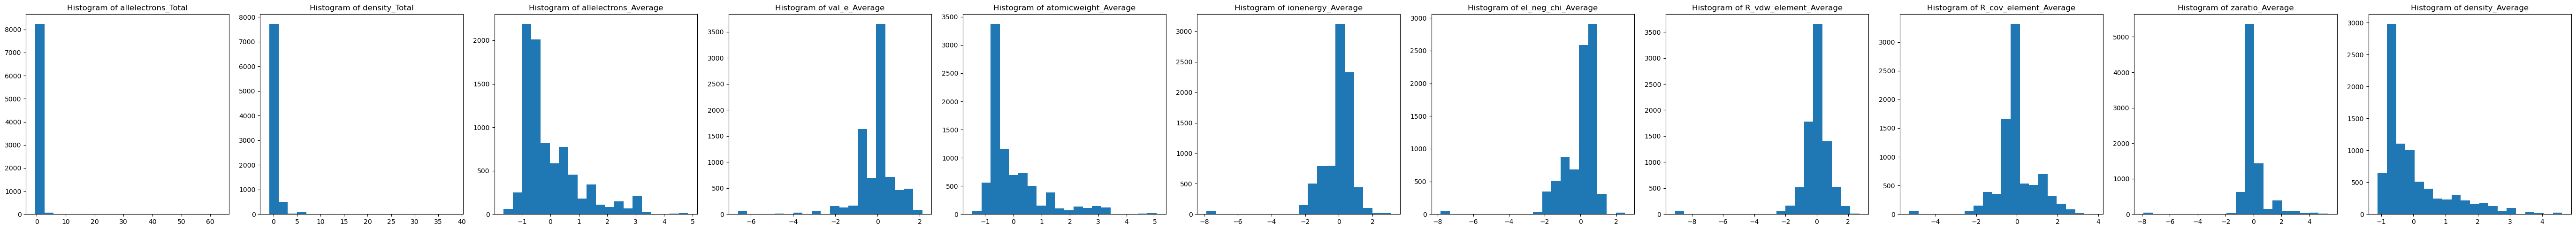

In [40]:
def show_hist_tf(X_tr):
    cols = X_tr.columns
    df = StandardScaler().fit_transform(X_tr)
    print(type(df))
    n_rows = 1
    n_cols = df.shape[1]
    
    plt.figure(figsize=(5 * n_cols, 5 * n_rows))
    
    for i, column in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(df[:,i],bins=20)
        plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

show_hist_tf(X_tr)

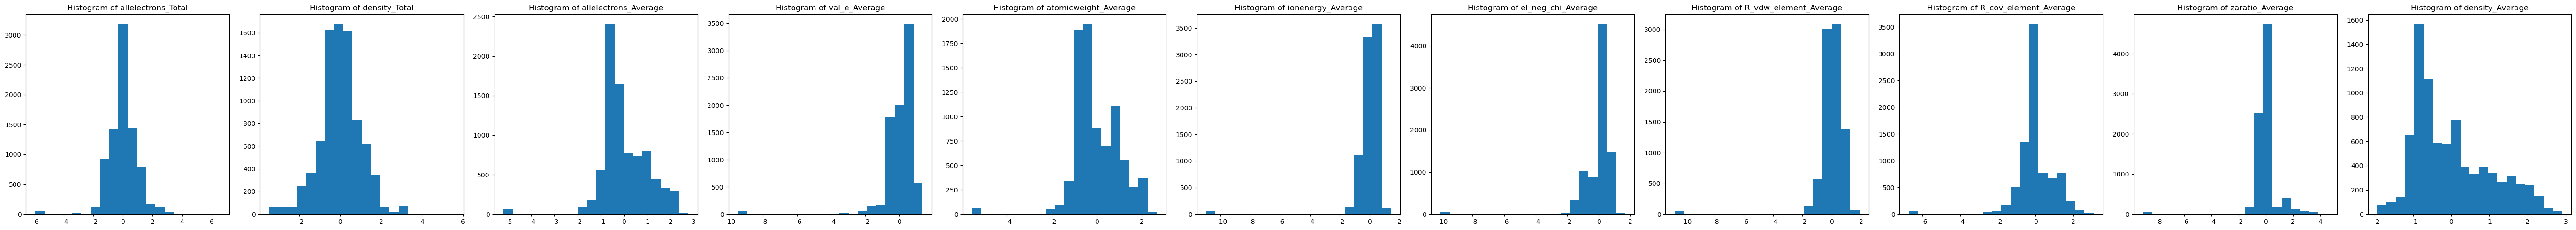

In [43]:
def show_hist_tf(X_tr):
    cols = X_tr.columns
    df = FunctionTransformer(lambda o: np.log(1+o)).fit_transform(X_tr)
    df = StandardScaler().fit_transform(df)
    n_rows = 1
    n_cols = df.shape[1]
    
    plt.figure(figsize=(5 * n_cols, 5 * n_rows))
    
    for i, column in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(df[:,i],bins=20)
        plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

show_hist_tf(X_tr)

In [19]:
tfs = [FunctionTransformer(lambda o: np.log(1+o))] #, StandardScaler(), RobustScaler(), MinMaxScaler(), QuantileTransformer()]
# model = HistGradientBoostingRegressor(loss='quantile', quantile=0.001)
qts = np.linspace(0.01,0.99,20)
res = []
for scaler in tfs:
    for qt in qts:
        model = HistGradientBoostingRegressor(loss='quantile', quantile=qt)
        pipe = make_pipeline(scaler, model)
        pipe.fit(X_tr,y_tr)
        y_pred =  pipe.predict(X_dev)
        res.append(medae(y_pred, y_dev))
plt.plot(res)

[3.2151882621588888,
 1.9787431066749521,
 1.2400568223462702,
 0.9613015176833744,
 0.825742012957665,
 0.7389581262880396,
 0.6405535965483038,
 0.5969749433355926,
 0.551743039437445,
 0.5142592173656199,
 0.5173104246080684,
 0.5374246936720879,
 0.5314594495644398,
 0.56336659654905,
 0.6071675004828374,
 0.6649679375534152,
 0.7426669760585606,
 0.9012241346803107,
 1.177910148733556,
 2.130019688580667]

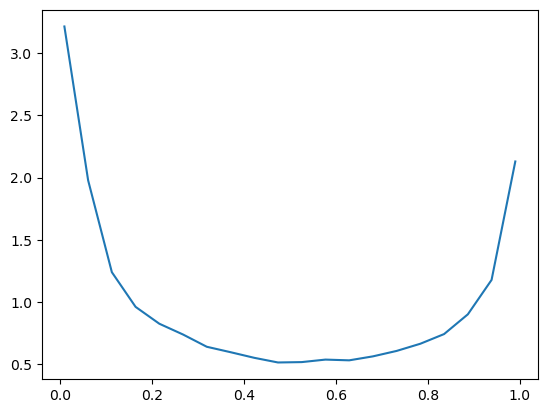

In [24]:
plt.plot(np.linspace(0.01,0.99,20), res)

In [37]:
from sklearn import metrics
for m in dir(metrics):
    if 'loss' in m:
        print(m)

brier_score_loss
hamming_loss
hinge_loss
label_ranking_loss
log_loss
mean_pinball_loss
zero_one_loss


In [76]:
tfs = [FunctionTransformer(lambda o: np.log(1+o))]#, StandardScaler(), RobustScaler(), MinMaxScaler()]
model = HistGradientBoostingRegressor(loss='quantile', quantile=0.5)

for scaler in tfs:
    
    pipe = make_pipeline(scaler, model)
    
    params = {
        'histgradientboostingregressor__learning_rate': loguniform(0.001,0.1)
    }
    
    # scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    
    search = RandomizedSearchCV(pipe, param_distributions=params, n_jobs=-1)
    search.fit(X_tr,y_tr)
    y_pred = search.predict(X_dev)
    print(np.abs(y_pred,y_dev).median())

5.352277523558817


## Submitting to Kaggle

In [ ]:
ss = pd.read_csv(path/'sample_submission.csv')
ss

In [ ]:
tst_files = get_image_files(path/'test_images').sorted()
tst_dl = dls.test_dl(tst_files)

In [ ]:
probs,_,idxs = learn.get_preds(dl=tst_dl, with_decoded=True)
idxs

In [ ]:
dls.vocab

In [ ]:
mapping = dict(enumerate(dls.vocab))
results = pd.Series(idxs.numpy(), name="idxs").map(mapping)
results

In [ ]:
ss['label'] = results
ss.to_csv('subm.csv', index=False)
!head subm.csv

In [ ]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('subm.csv', 'initial rn26d 128px', comp)

## Conclusion

## Addendum

In [ ]:
if not iskaggle:
    push_notebook('xy', 'mock-first-steps-road-to-the-top-part-1',
                  title='mock First Steps: Road to the Top, Part 1',
                  file='mock-first-steps-road-to-the-top-part-1.ipynb',
                  competition=comp, private=False, gpu=True)